In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
pew_data = pd.read_csv("pew.csv")

In [4]:
pew_data

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [5]:
pew_data.shape

(18, 11)

In [6]:
pew_data.dtypes

religion              object
<$10k                  int64
$10-20k                int64
$20-30k                int64
$30-40k                int64
$40-50k                int64
$50-75k                int64
$75-100k               int64
$100-150k              int64
>150k                  int64
Don't know/refused     int64
dtype: object

In [7]:
pew_data_tidy = pd.melt(pew_data, id_vars = ["religion"], var_name="income_group"  ,value_name="count")

In [8]:
pew_data_tidy.dtypes

religion        object
income_group    object
count            int64
dtype: object

In [9]:
pew_data_tidy["income_group"] = pew_data_tidy["income_group"].astype("category")

In [10]:
pew_data_tidy.dtypes

religion          object
income_group    category
count              int64
dtype: object

In [11]:
pew_data_tidy.groupby("religion")["count"].mean()

religion
Agnostic                    82.6
Atheist                     51.5
Buddhist                    41.1
Catholic                   805.4
Don’t know/refused          27.2
Evangelical Prot           947.2
Hindu                       25.7
Historically Black Prot    199.5
Jehovah's Witness           21.5
Jewish                      68.2
Mainline Prot              747.0
Mormon                      58.1
Muslim                      11.6
Orthodox                    36.3
Other Christian             12.9
Other Faiths                44.9
Other World Religions        4.2
Unaffiliated               370.7
Name: count, dtype: float64

In [12]:
pew_data_tidy.groupby("religion")["count"].median()

religion
Agnostic                    82.5
Atheist                     55.5
Buddhist                    36.5
Catholic                   701.0
Don’t know/refused          16.0
Evangelical Prot           915.0
Hindu                       22.5
Historically Black Prot    225.5
Jehovah's Witness           22.5
Jewish                      49.5
Mainline Prot              653.0
Mormon                      50.0
Muslim                       9.0
Orthodox                    35.0
Other Christian             13.0
Other Faiths                43.5
Other World Religions        4.0
Unaffiliated               353.0
Name: count, dtype: float64

In [13]:
tb_data = pd.read_csv("tb.csv")

In [14]:
tb_data.sample(5)

,iso2,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
5758,ZW,1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5596,WF,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
805,BW,2001,NaN,NaN,15.0,190.0,539.0,490.0,288.0,116.0,...,NaN,NaN,33.0,328.0,493.0,309.0,116.0,46.0,23.0,NaN
2124,HK,1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4086,PF,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
tb_data.iso2.unique()

array(['AD', 'AE', 'AF', 'AG', 'AI', 'AL', 'AM', 'AN', 'AO', 'AR', 'AS',
       'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI',
       'BJ', 'BM', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA',
       'CD', 'CF', 'CG', 'CH', 'CI', 'CK', 'CL', 'CM', 'CN', 'CO', 'CR',
       'CU', 'CV', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC',
       'EE', 'EG', 'ER', 'ES', 'ET', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB',
       'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GU', 'GW', 'GY',
       'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IR',
       'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI', 'KM', 'KN',
       'KP', 'KR', 'KW', 'KY', 'KZ', 'LA', 'LB', 'LC', 'LK', 'LR', 'LS',
       'LT', 'LU', 'LV', 'LY', 'MA', 'MC', 'MD', 'ME', 'MG', 'MH', 'MK',
       'ML', 'MM', 'MN', 'MO', 'MP', 'MR', 'MS', 'MT', 'MU', 'MV', 'MW',
       'MX', 'MY', 'MZ', nan, 'NC', 'NE', 'NG', 'NI', 'NL', 'NO', 'NP',
       'NR', 'NU', 'NZ', 'OM', 'PA', 'PE', 'PF', 'PG

In [16]:
tb_data_tidy = tb_data.melt(id_vars = ["iso2", "year"], var_name="gender_and_age", value_name="count")

In [17]:
tb_data_tidy.sample(5)

,iso2,year,gender_and_age,count
79787,SO,2001,f1524,439.0
31531,KM,1992,m3544,NaN
75911,CD,1994,f1524,NaN
57246,UA,2006,mu,0.0
12634,CL,2005,m014,3.0


In [18]:
tb_data_tidy.gender_and_age.str.slice(0, 1)

0         m
1         m
2         m
3         m
4         m
5         m
6         m
7         m
8         m
9         m
10        m
11        m
12        m
13        m
14        m
15        m
16        m
17        m
18        m
19        m
20        m
21        m
22        m
23        m
24        m
25        m
26        m
27        m
28        m
29        m
         ..
115350    f
115351    f
115352    f
115353    f
115354    f
115355    f
115356    f
115357    f
115358    f
115359    f
115360    f
115361    f
115362    f
115363    f
115364    f
115365    f
115366    f
115367    f
115368    f
115369    f
115370    f
115371    f
115372    f
115373    f
115374    f
115375    f
115376    f
115377    f
115378    f
115379    f
Name: gender_and_age, Length: 115380, dtype: object

In [19]:
tb = pd.read_csv("tb.csv")

# Melt the values

tb = pd.melt(tb, id_vars = ["iso2","year"],
value_name = "cases", var_name = "sex_and_age")

# Separate the columns and merge back

parts = tb["sex_and_age"].str.extract("(\D)(\d+)(\d{2})", expand = True)

parts.columns = ["sex", "age_lower", "age_upper"]

parts["age"] = parts["age_lower"] + "-" + parts["age_upper"]

tb = pd.concat([tb, parts], axis = 1)

# Remove missing values and sort them

tb = tb.drop(["sex_and_age", "age_lower", "age_upper"], axis = 1)

tb = tb.dropna()

tb = tb.sort_values(by = ["iso2", "year", "sex", "age", "cases"])

# The index is now wrong, reindex to make it better

tb = tb.reset_index()

del tb["index"]

In [20]:
tb

,iso2,year,cases,sex,age
0,AD,1996,0.0,f,0-14
1,AD,1996,1.0,f,15-24
2,AD,1996,1.0,f,25-34
3,AD,1996,0.0,f,35-44
4,AD,1996,0.0,f,45-54
5,AD,1996,1.0,f,55-64
6,AD,1996,0.0,m,0-14
7,AD,1996,0.0,m,15-24
8,AD,1996,0.0,m,25-34
9,AD,1996,4.0,m,35-44


In [21]:
tb[tb["iso2"] == "BG"]

,iso2,year,cases,sex,age
2467,BG,2000,0.0,f,0-14
2468,BG,2000,11.0,f,15-24
2469,BG,2000,14.0,f,25-34
2470,BG,2000,7.0,f,35-44
2471,BG,2000,3.0,f,45-54
2472,BG,2000,4.0,f,55-64
2473,BG,2000,0.0,m,0-14
2474,BG,2000,13.0,m,15-24
2475,BG,2000,16.0,m,25-34
2476,BG,2000,20.0,m,35-44


In [22]:
tb[tb["iso2"] == "BG"].cases

2467      0.0
2468     11.0
2469     14.0
2470      7.0
2471      3.0
2472      4.0
2473      0.0
2474     13.0
2475     16.0
2476     20.0
2477      3.0
2478      9.0
2479      1.0
2480     11.0
2481     16.0
2482     13.0
2483      5.0
2484      2.0
2485      1.0
2486     15.0
2487     20.0
2488     23.0
2489     23.0
2490     18.0
2491      6.0
2492     48.0
2493     73.0
2494     45.0
2495     19.0
2496      9.0
        ...  
2551    184.0
2552    133.0
2553      4.0
2554     63.0
2555     77.0
2556     53.0
2557     38.0
2558      2.0
2559     29.0
2560      7.0
2561     63.0
2562    122.0
2563    181.0
2564    176.0
2565      5.0
2566    131.0
2567      1.0
2568     57.0
2569     78.0
2570     54.0
2571     31.0
2572      0.0
2573     23.0
2574      2.0
2575     80.0
2576    145.0
2577    151.0
2578    159.0
2579      1.0
2580    127.0
Name: cases, Length: 114, dtype: float64

In [23]:
tb[tb["iso2"] == "BG"].cases.mean()

63.219298245614034

In [24]:
tb[tb["iso2"] == "BG"].groupby("year").cases.mean()

year
2000     8.333333
2001    12.333333
2002    54.666667
2003    92.250000
2004    94.416667
2005    82.142857
2006    87.750000
2007    67.928571
2008    64.928571
Name: cases, dtype: float64

In [25]:
temp_data = pd.read_csv("weather.csv")

In [26]:
temp_data.head()

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
temp_data["id"].unique()

array(['MX17004'], dtype=object)

In [28]:
temp_data = pd.read_csv("weather.csv")

temp_data = pd.melt(temp_data,
id_vars = ["id", "year", "month", "element"], var_name = "day")

temp_data["day"] = temp_data["day"].str.extract("(\d+)", expand = True).astype(np.int64)

# Remove missing / invalid days (e.g. 31st April) and dates with no records

temp_data = temp_data.dropna()

temp_data["date"] = pd.to_datetime(temp_data[["year", "month", "day"]])

temp_data = temp_data.drop(["year", "month", "day"], axis = 1)

# Pivot the elements back to their own columns

temp_data = temp_data.pivot_table(index = ["id", "date"], columns = "element", values = "value")

# Pivoting returns a multi-indexed element, go back to a flat DataFrame

temp_data.reset_index(inplace = True)

temp_data.columns.name = ""

temp_data = temp_data.drop("id", axis = 1)

In [29]:
temp_data

,date,tmax,tmin
0,2010-01-30,27.8,14.5
1,2010-02-02,27.3,14.4
2,2010-02-03,24.1,14.4
3,2010-02-11,29.7,13.4
4,2010-02-23,29.9,10.7
5,2010-03-05,32.1,14.2
6,2010-03-10,34.5,16.8
7,2010-03-16,31.1,17.6
8,2010-04-27,36.3,16.7
9,2010-05-27,33.2,18.2


In [30]:
billboard_data = pd.read_csv("billboard.csv")

In [31]:
billboard_data

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,98^0,Give Me Just One Nig...,3:24,2000-08-19,51,39.0,34.0,26.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,A*Teens,Dancing Queen,3:44,2000-07-08,97,97.0,96.0,95.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29,84,62.0,51.0,41.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Aaliyah,Try Again,4:03,2000-03-18,59,53.0,38.0,28.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,"Adams, Yolanda",Open My Heart,5:30,2000-08-26,76,76.0,74.0,69.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
billboard_data.shape

(317, 81)

In [33]:
billboard_data_tidy = billboard_data.melt(id_vars = ["year", "artist", "track", "time", "date.entered"], var_name ="week", value_name = "position")

In [34]:
billboard_data_tidy = billboard_data_tidy.dropna()

In [35]:
billboard_data_tidy.position = billboard_data_tidy.position.astype("int")

In [36]:
billboard_data_tidy.dtypes

year             int64
artist          object
track           object
time            object
date.entered    object
week            object
position         int32
dtype: object

In [37]:
billboard_data_tidy.head()

,year,artist,track,time,date.entered,week,position
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57


In [38]:
songs = billboard_data_tidy[["year", "artist", "track", "time"]]

In [39]:
songs.head()

,year,artist,track,time
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22
1,2000,2Ge+her,The Hardest Part Of ...,3:15
2,2000,3 Doors Down,Kryptonite,3:53
3,2000,3 Doors Down,Loser,4:24
4,2000,504 Boyz,Wobble Wobble,3:35


In [40]:
songs.tail()

,year,artist,track,time
19716,2000,Creed,Higher,5:16
19833,2000,Lonestar,Amazed,4:25
20033,2000,Creed,Higher,5:16
20150,2000,Lonestar,Amazed,4:25
20350,2000,Creed,Higher,5:16


In [41]:
songs.sample(6)

,year,artist,track,time
101,2000,"Fabian, Lara",I Will Love Again,3:43
499,2000,"Lopez, Jennifer",Feelin' Good,4:28
69,2000,DMX,What's My Name,3:50
2371,2000,"Jones, Donell",Where I Wanna Be,6:22
888,2000,Savage Garden,I Knew I Loved You,4:07
491,2000,Lil' Mo,Ta Da,4:17


In [42]:
temp_data.nlargest(10, "tmin")

,date,tmax,tmin
9,2010-05-27,33.2,18.2
11,2010-06-29,30.1,18.0
7,2010-03-16,31.1,17.6
10,2010-06-17,28.0,17.5
12,2010-07-03,28.6,17.5
15,2010-08-08,29.0,17.3
6,2010-03-10,34.5,16.8
8,2010-04-27,36.3,16.7
13,2010-07-14,29.9,16.5
16,2010-08-13,29.8,16.5


In [43]:
temp_data.nlargest(10, "tmax")

,date,tmax,tmin
8,2010-04-27,36.3,16.7
6,2010-03-10,34.5,16.8
9,2010-05-27,33.2,18.2
5,2010-03-05,32.1,14.2
26,2010-11-02,31.3,16.3
25,2010-10-28,31.2,15.0
7,2010-03-16,31.1,17.6
11,2010-06-29,30.1,18.0
4,2010-02-23,29.9,10.7
13,2010-07-14,29.9,16.5


In [44]:
temp_data.loc[0:10]

,date,tmax,tmin
0,2010-01-30,27.8,14.5
1,2010-02-02,27.3,14.4
2,2010-02-03,24.1,14.4
3,2010-02-11,29.7,13.4
4,2010-02-23,29.9,10.7
5,2010-03-05,32.1,14.2
6,2010-03-10,34.5,16.8
7,2010-03-16,31.1,17.6
8,2010-04-27,36.3,16.7
9,2010-05-27,33.2,18.2


In [45]:
temp_data[["date", "tmin"]]

,date,tmin
0,2010-01-30,14.5
1,2010-02-02,14.4
2,2010-02-03,14.4
3,2010-02-11,13.4
4,2010-02-23,10.7
5,2010-03-05,14.2
6,2010-03-10,16.8
7,2010-03-16,17.6
8,2010-04-27,16.7
9,2010-05-27,18.2


In [46]:
temp_data.tmin > 15

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17    False
18     True
19     True
20     True
21    False
22    False
23    False
24    False
25    False
26     True
27    False
28    False
29    False
30    False
31    False
32    False
Name: tmin, dtype: bool

In [47]:
temp_data[temp_data.tmin > 15]

,date,tmax,tmin
6,2010-03-10,34.5,16.8
7,2010-03-16,31.1,17.6
8,2010-04-27,36.3,16.7
9,2010-05-27,33.2,18.2
10,2010-06-17,28.0,17.5
11,2010-06-29,30.1,18.0
12,2010-07-03,28.6,17.5
13,2010-07-14,29.9,16.5
14,2010-08-05,29.6,15.8
15,2010-08-08,29.0,17.3


In [48]:
temp_data[~(temp_data.tmin > 15)]

,date,tmax,tmin
0,2010-01-30,27.8,14.5
1,2010-02-02,27.3,14.4
2,2010-02-03,24.1,14.4
3,2010-02-11,29.7,13.4
4,2010-02-23,29.9,10.7
5,2010-03-05,32.1,14.2
17,2010-08-23,26.4,15.0
21,2010-10-05,27.0,14.0
22,2010-10-07,28.1,12.9
23,2010-10-14,29.5,13.0


In [49]:
temp_data[(temp_data.tmin > 15) & (temp_data.tmin < 20)]

,date,tmax,tmin
6,2010-03-10,34.5,16.8
7,2010-03-16,31.1,17.6
8,2010-04-27,36.3,16.7
9,2010-05-27,33.2,18.2
10,2010-06-17,28.0,17.5
11,2010-06-29,30.1,18.0
12,2010-07-03,28.6,17.5
13,2010-07-14,29.9,16.5
14,2010-08-05,29.6,15.8
15,2010-08-08,29.0,17.3


In [50]:
(temp_data.tmax < temp_data.tmin).any()

False

In [51]:
temp_data["amplitude"] = temp_data.tmax - temp_data.tmin

In [52]:
temp_data.head()

,date,tmax,tmin,amplitude
0,2010-01-30,27.8,14.5,13.3
1,2010-02-02,27.3,14.4,12.9
2,2010-02-03,24.1,14.4,9.7
3,2010-02-11,29.7,13.4,16.3
4,2010-02-23,29.9,10.7,19.2


In [53]:
temp_data.amplitude.max()

19.599999999999998

In [54]:
temp_data[temp_data.amplitude == temp_data.amplitude.max()]

,date,tmax,tmin,amplitude
8,2010-04-27,36.3,16.7,19.6


In [55]:
temp_data.tmin.std()

2.4737523638342944

In [56]:
temp_data.describe().T

,count,mean,std,min,25%,50%,75%,max
,,,,,,,,
tmax,33.0,29.190909,2.497419,24.1,27.8,29.0,29.9,36.3
tmin,33.0,14.651515,2.473752,7.9,13.4,15.0,16.5,18.2
amplitude,33.0,14.539394,2.691763,9.7,12.9,14.1,16.3,19.6


In [57]:
for artist_name, data in billboard_data_tidy.groupby("artist"):
    print(artist_name)
    print(data)
    break

2 Pac
      year artist                    track  time date.entered week  position
0     2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk1        87
317   2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk2        82
634   2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk3        72
951   2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk4        77
1268  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk5        87
1585  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk6        94
1902  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk7        99


In [58]:
pew_data_tidy.groupby("income_group")["count"].mean()

income_group
$10-20k               154.500000
$100-150k             177.611111
$20-30k               186.500000
$30-40k               183.444444
$40-50k               171.388889
$50-75k               288.055556
$75-100k              221.666667
<$10k                 107.222222
>150k                 144.888889
Don't know/refused    340.055556
Name: count, dtype: float64

In [59]:
pew_data_tidy.groupby("religion")["count"].mean()

religion
Agnostic                    82.6
Atheist                     51.5
Buddhist                    41.1
Catholic                   805.4
Don’t know/refused          27.2
Evangelical Prot           947.2
Hindu                       25.7
Historically Black Prot    199.5
Jehovah's Witness           21.5
Jewish                      68.2
Mainline Prot              747.0
Mormon                      58.1
Muslim                      11.6
Orthodox                    36.3
Other Christian             12.9
Other Faiths                44.9
Other World Religions        4.2
Unaffiliated               370.7
Name: count, dtype: float64

In [60]:
pew_data_tidy.groupby(["income_group","religion"])["count"].mean()

income_group        religion               
$10-20k             Agnostic                     34
                    Atheist                      27
                    Buddhist                     21
                    Catholic                    617
                    Don’t know/refused           14
                    Evangelical Prot            869
                    Hindu                         9
                    Historically Black Prot     244
                    Jehovah's Witness            27
                    Jewish                       19
                    Mainline Prot               495
                    Mormon                       40
                    Muslim                        7
                    Orthodox                     17
                    Other Christian               7
                    Other Faiths                 33
                    Other World Religions         2
                    Unaffiliated                299
$100-150k           

In [61]:
weather_data = pd.read_csv("https://raw.githubusercontent.com/synesthesiam/blog/master/posts/data/weather_year.csv")

In [62]:
weather_data.head()

,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2012-3-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-3-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-3-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-3-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-3-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00,0,NaN,202


In [63]:
weather_data.shape

(366, 23)

In [64]:
weather_data.columns = ["date", "max_temp", "mean_temp", "min_temp", "max_dew",
"mean_dew", "min_dew", "max_humidity", "mean_humidity",
"min_humidity", "max_pressure", "mean_pressure",
"min_pressure", "max_visibilty", "mean_visibility",
"min_visibility", "max_wind", "mean_wind", "min_wind",
"precipitation", "cloud_cover", "events", "wind_dir"]

In [65]:
weather_data.columns

Index(['date', 'max_temp', 'mean_temp', 'min_temp', 'max_dew', 'mean_dew',
       'min_dew', 'max_humidity', 'mean_humidity', 'min_humidity',
       'max_pressure', 'mean_pressure', 'min_pressure', 'max_visibilty',
       'mean_visibility', 'min_visibility', 'max_wind', 'mean_wind',
       'min_wind', 'precipitation', 'cloud_cover', 'events', 'wind_dir'],
      dtype='object')

In [66]:
weather_data.dtypes

date                object
max_temp             int64
mean_temp            int64
min_temp             int64
max_dew              int64
mean_dew             int64
min_dew              int64
max_humidity         int64
mean_humidity        int64
min_humidity         int64
max_pressure       float64
mean_pressure      float64
min_pressure       float64
max_visibilty        int64
mean_visibility      int64
min_visibility       int64
max_wind             int64
mean_wind            int64
min_wind           float64
precipitation       object
cloud_cover          int64
events              object
wind_dir             int64
dtype: object

In [67]:
weather_data.events.unique()

array([nan, 'Rain', 'Rain-Thunderstorm', 'Fog-Thunderstorm', 'Fog-Rain',
       'Thunderstorm', 'Fog-Rain-Thunderstorm', 'Fog', 'Fog-Rain-Snow',
       'Fog-Rain-Snow-Thunderstorm', 'Fog-Snow', 'Snow', 'Rain-Snow'],
      dtype=object)

In [68]:
weather_data.events.isna().sum()

204

In [69]:
weather_data.events.isna().sum() / len(weather_data) * 100

55.73770491803278

In [70]:
weather_data.date.head()

0    2012-3-10
1    2012-3-11
2    2012-3-12
3    2012-3-13
4    2012-3-14
Name: date, dtype: object

In [71]:
def string_to_date(date_string):
    return datetime.strptime(date_string, "%Y-%m-%d")

In [72]:
weather_data.date = weather_data.date.apply(string_to_date)

In [73]:
weather_data.dtypes

date               datetime64[ns]
max_temp                    int64
mean_temp                   int64
min_temp                    int64
max_dew                     int64
mean_dew                    int64
min_dew                     int64
max_humidity                int64
mean_humidity               int64
min_humidity                int64
max_pressure              float64
mean_pressure             float64
min_pressure              float64
max_visibilty               int64
mean_visibility             int64
min_visibility              int64
max_wind                    int64
mean_wind                   int64
min_wind                  float64
precipitation              object
cloud_cover                 int64
events                     object
wind_dir                    int64
dtype: object

In [74]:
presures = weather_data.min_pressure.unique()

In [75]:
presures.sort()

In [76]:
presures

array([29.23, 29.29, 29.37, 29.43, 29.45, 29.46, 29.52, 29.53, 29.56,
       29.57, 29.6 , 29.62, 29.63, 29.64, 29.65, 29.66, 29.67, 29.68,
       29.69, 29.7 , 29.71, 29.72, 29.73, 29.74, 29.75, 29.76, 29.77,
       29.78, 29.79, 29.8 , 29.81, 29.82, 29.83, 29.84, 29.85, 29.86,
       29.87, 29.88, 29.89, 29.9 , 29.91, 29.92, 29.93, 29.94, 29.95,
       29.96, 29.97, 29.98, 29.99, 30.  , 30.01, 30.02, 30.03, 30.04,
       30.05, 30.06, 30.07, 30.08, 30.09, 30.1 , 30.11, 30.12, 30.13,
       30.14, 30.15, 30.16, 30.17, 30.18, 30.19, 30.2 , 30.21, 30.22,
       30.23, 30.24, 30.25, 30.26, 30.27, 30.29, 30.3 , 30.32, 30.33,
       30.34, 30.35, 30.38, 30.39, 30.41, 30.44])

In [77]:
weather_data.min_pressure.isna().any()

False

In [78]:
weather_data.precipitation.unique()

array(['0.00', 'T', '0.03', '0.04', '0.14', '0.86', '0.06', '0.01',
       '0.51', '0.69', '1.45', '0.38', '0.19', '0.15', '0.49', '0.29',
       '0.09', '0.90', '0.02', '0.07', '0.13', '0.10', '0.36', '0.27',
       '0.16', '0.26', '0.31', '0.05', '0.32', '1.85', '0.53', '2.00',
       '0.92', '1.10', '0.17', '1.13', '0.63', '0.50', '0.71', '0.73',
       '1.52', '0.47', '0.39', '0.18', '0.77', '0.08', '0.33', '0.44',
       '0.48', '0.20', '0.12', '0.82', '1.16', '1.73', '0.40', '0.99',
       '0.30', '1.17'], dtype=object)

([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.

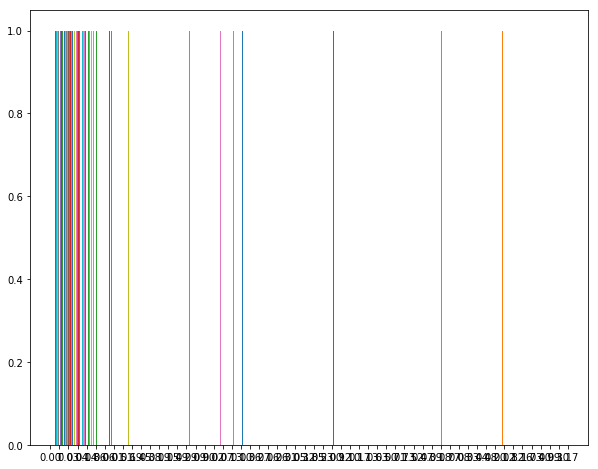

In [79]:
plt.figure(figsize = (10, 8))
plt.hist(weather_data.precipitation)

In [80]:
weather_data.precipitation.describe()

count      366
unique      58
top       0.00
freq       215
Name: precipitation, dtype: object

In [82]:
precipitation_values = (weather_data.precipitation[weather_data.precipitation != "T"]).astype(float)

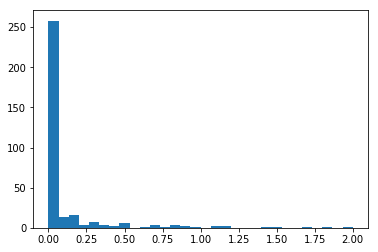

In [86]:
plt.hist(precipitation_values, bins = 30)
plt.show()

In [88]:
weather_data.precipitation = weather_data.precipitation.apply(lambda val: 0.0001 if val == "T" else float(val))

In [90]:
weather_data.dtypes

date               datetime64[ns]
max_temp                    int64
mean_temp                   int64
min_temp                    int64
max_dew                     int64
mean_dew                    int64
min_dew                     int64
max_humidity                int64
mean_humidity               int64
min_humidity                int64
max_pressure              float64
mean_pressure             float64
min_pressure              float64
max_visibilty               int64
mean_visibility             int64
min_visibility              int64
max_wind                    int64
mean_wind                   int64
min_wind                  float64
precipitation             float64
cloud_cover                 int64
events                     object
wind_dir                    int64
dtype: object

In [92]:
weather_data.events = weather_data.events.fillna("")

In [95]:
weather_data.events.head()

0        
1    Rain
2    Rain
3        
4        
Name: events, dtype: object

In [96]:
weather_data.events.unique()

array(['', 'Rain', 'Rain-Thunderstorm', 'Fog-Thunderstorm', 'Fog-Rain',
       'Thunderstorm', 'Fog-Rain-Thunderstorm', 'Fog', 'Fog-Rain-Snow',
       'Fog-Rain-Snow-Thunderstorm', 'Fog-Snow', 'Snow', 'Rain-Snow'],
      dtype=object)

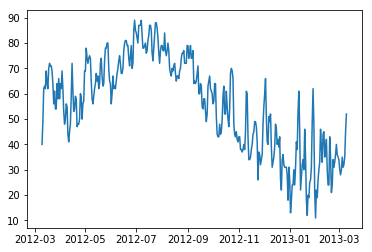

In [98]:
plt.plot(weather_data.date, weather_data.mean_temp)
plt.show()